# *Transformer*

트랜스포머(Transformer)는 2017년 구글이 발표한 논문인 <b>Attiontion is all you need</b>(https://arxiv.org/abs/1706.03762)에서 나온 모델로<br>
기존 Seq2Seq 구조인 인코더-디코더 구조를 따르면서, <u>논문 이름처럼 Attention으로만 구현한 모델</u><br>
이 모델은 RNN을 사용하지 않고, 인코더-디코더 구조를 설계했음에도 번역 성능에서 RNN보다 우수한 성능을 보임

# 

### 👉🏻 기존 Seq2Seq 모델 한계
기존 Seq2Seq 모델은 인코더-디코더 구조로 구성되어 있음<br>
인코더는 <u>입력 시퀀스를 하나의 컨텍스트 벡터로 압축하고</u>, 디코더는 <u>이 벡터를 통해 출력 시퀀스를 만듦</u><br>
<blockquote>이러한 구조는 입력 시퀀스를 하나의 벡터를 압축하는 과정에서 <b>입력 시퀀스의 정보가 일부 손실된다는 단점</b>이 있음</blockquote>

# 

### 👉🏻 트랜스포머(Transformer)
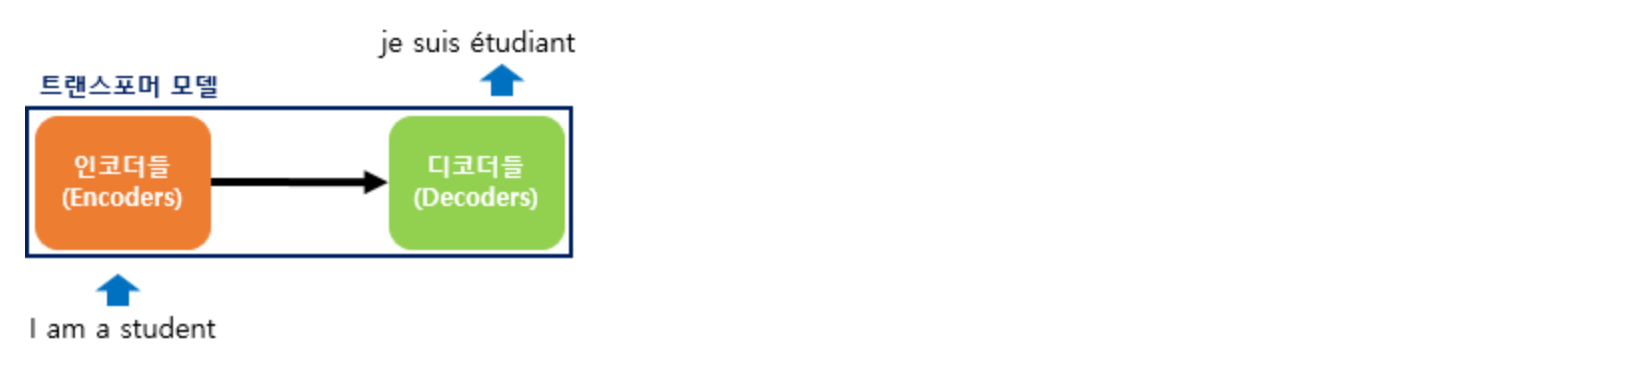
트랜스포머는 RNN을 사용하지는 않지만 Seq2Seq처럼 인코더에서 입력 시퀀스를 입력받고, 디코더에서 출력 시퀀스를 출력하는 인코더-디코더 구조를 유지하고 있음<br>
Seq2Seq 구조에서는 인코더, 디코더에서 각각 하나의 RNN이 t개의 시점(time step)을 가지는 구조라면, <b>트랜스포머</b>는 인코더, 디코더라는 단위가 N개로 구성되는 구조<br><br>
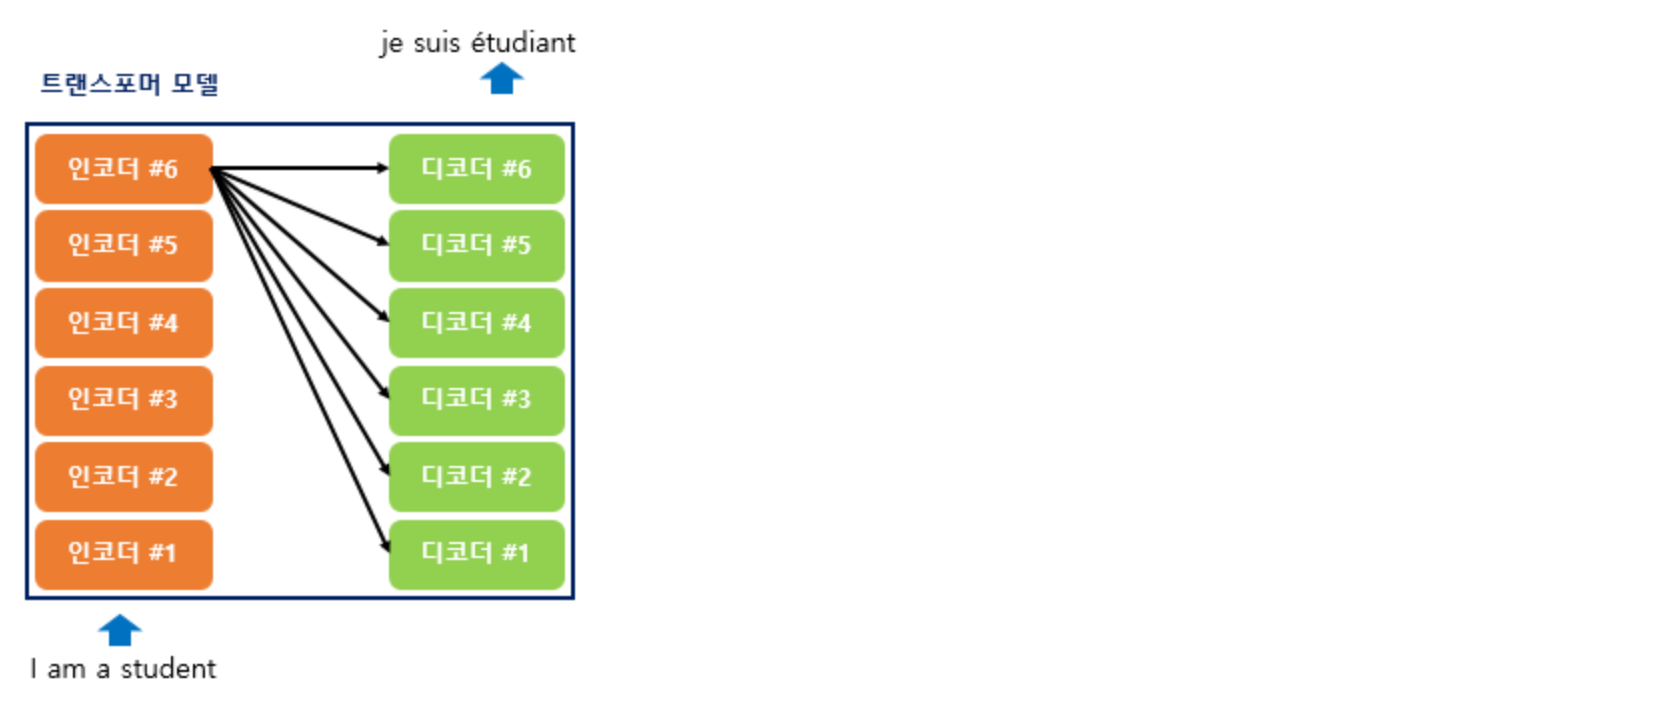
인코더, 디코더가 6개씩 존재하는 트랜스포머 구조<br>
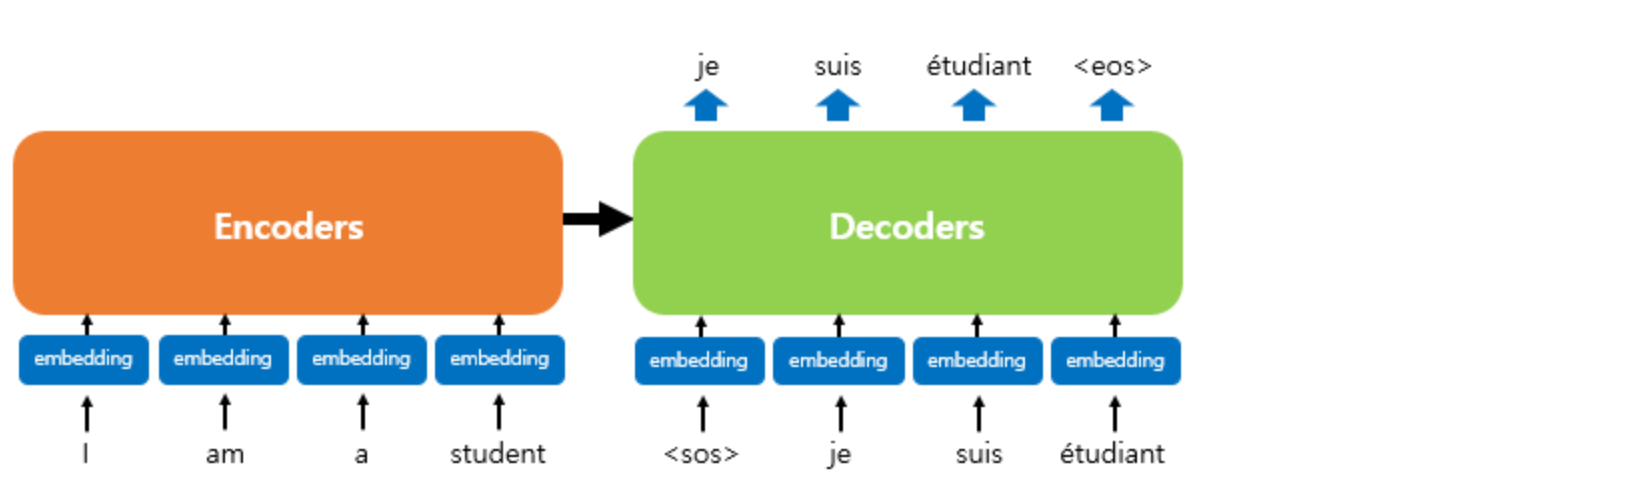
인코더, 디코더가 6개랴 Encoders, Decoders로 표현<br>
디코더는 기존 Seq2Seq 구조처럼 시작 심볼 < sos >를 입력받아 종료 심볼 < eos > 가 나올 때까지 연산을 진행<br>
<b>RNN은 사용하지 않으나 인코더-디코더 구조는 유지하고 있음</b>

# 

### 👉🏻 포지셔널 인코딩(Positional Encoding)
RNN은 단어 위치에 따라 단어를 순차적으로 입력받아 처리하므로 <u>각 단어의 위치 정보(Position Information)를 가질 수 있다</u>는 장점이 있음<br>
트랜스포머는 단어 입력을 순차적으로 입력받는 방식이 아니므로 단어의 위치 정보를 <b>각 단어의 임베딩 벡터에 위치 정보들을 더하여 모델의 입력으로 사용함</b>(Positional Encoding)<br>
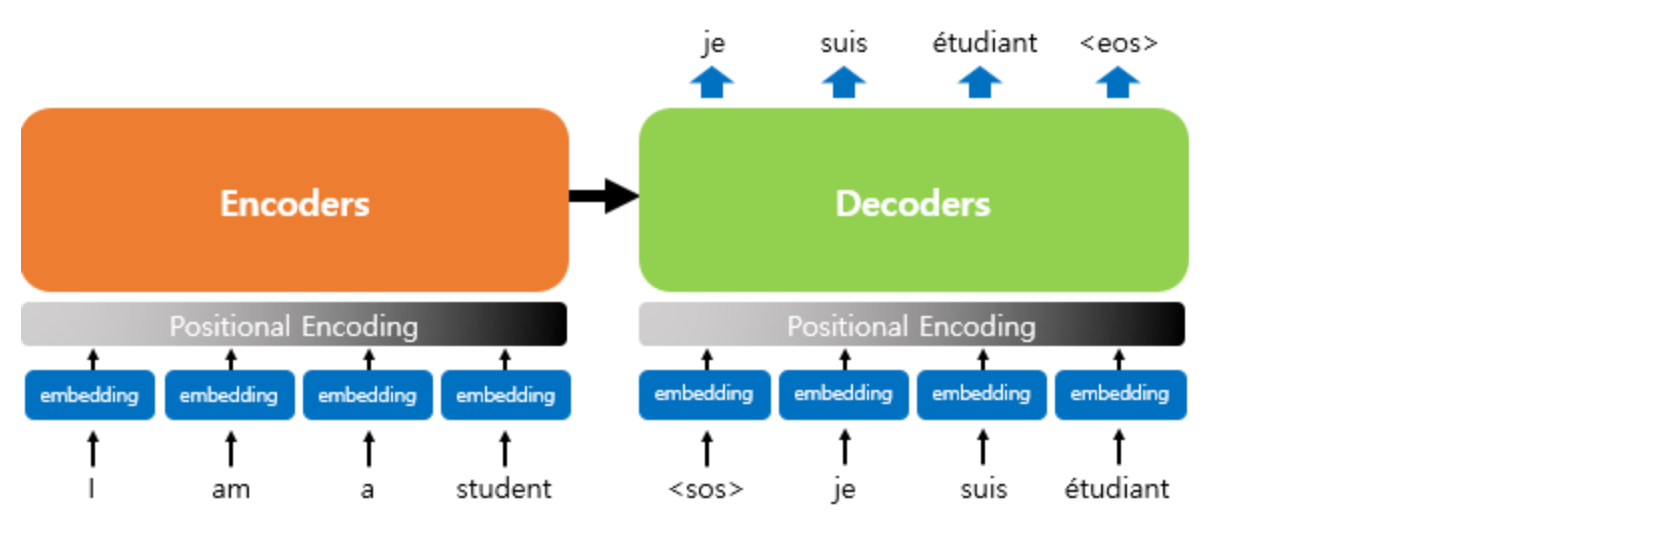
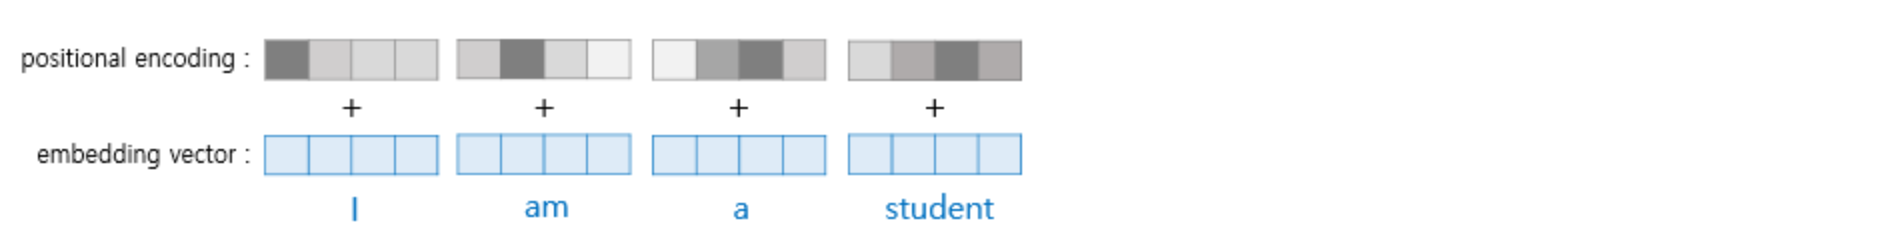
<b>임베딩 벡터들이 트랜스포머 입력으로 사용되기 전에 포지셔널 인코딩 값이 더해지는 과정</b><br>
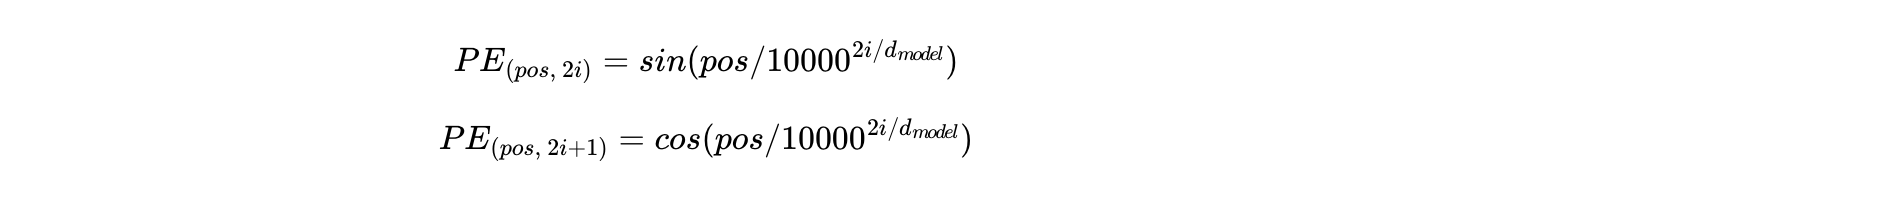
사인, 코사인 함수 값을 임베딩 벡터에 더해주므로 단어 순서 정보를 더해줌<br>
<b>임베딩 벡터, 포지셔널 인코딩 덧셈</b>은 임베딩 벡터가 모여 만들어진 문장 행렬과 포지셔널 인코딩 행렬의 덧셈 연산을 통해 이루어짐

# 

### 👉🏻 어텐션(Attention)
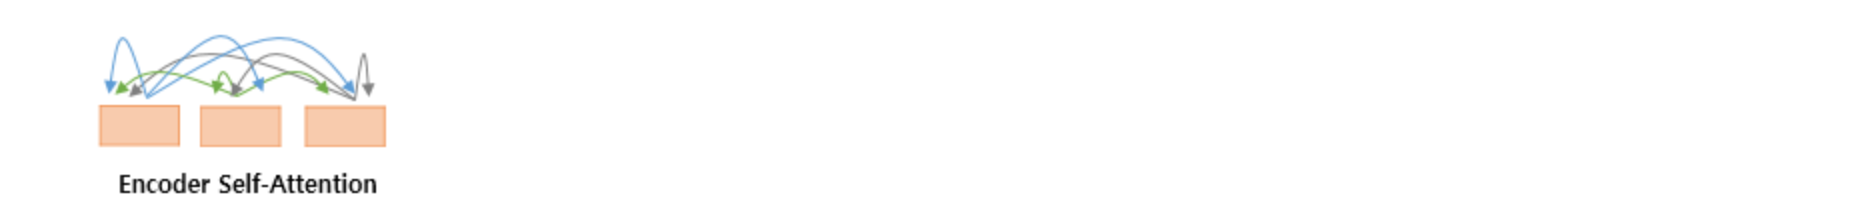
Encoder<br>
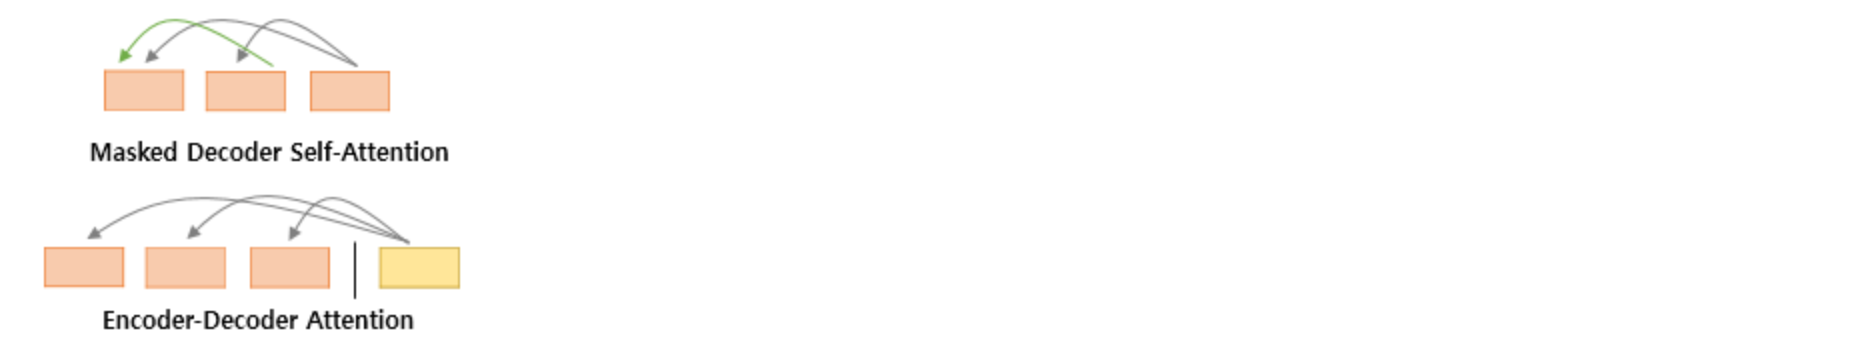
Decoder<br><br>
셀프 어텐션은 본질적으로 Query, Key, Value가 동일한 경우<br>
<blockquote>인코더의 셀프 어텐션 : Query = Key = Value<br>
디코더의 마스크드 셀프 어텐션 : Query = Key = Value<br>
디코더의 인코더-디코더 어텐션 : Query : 디코더 벡터 / Key = Value : 인코더 벡터</blockquote>

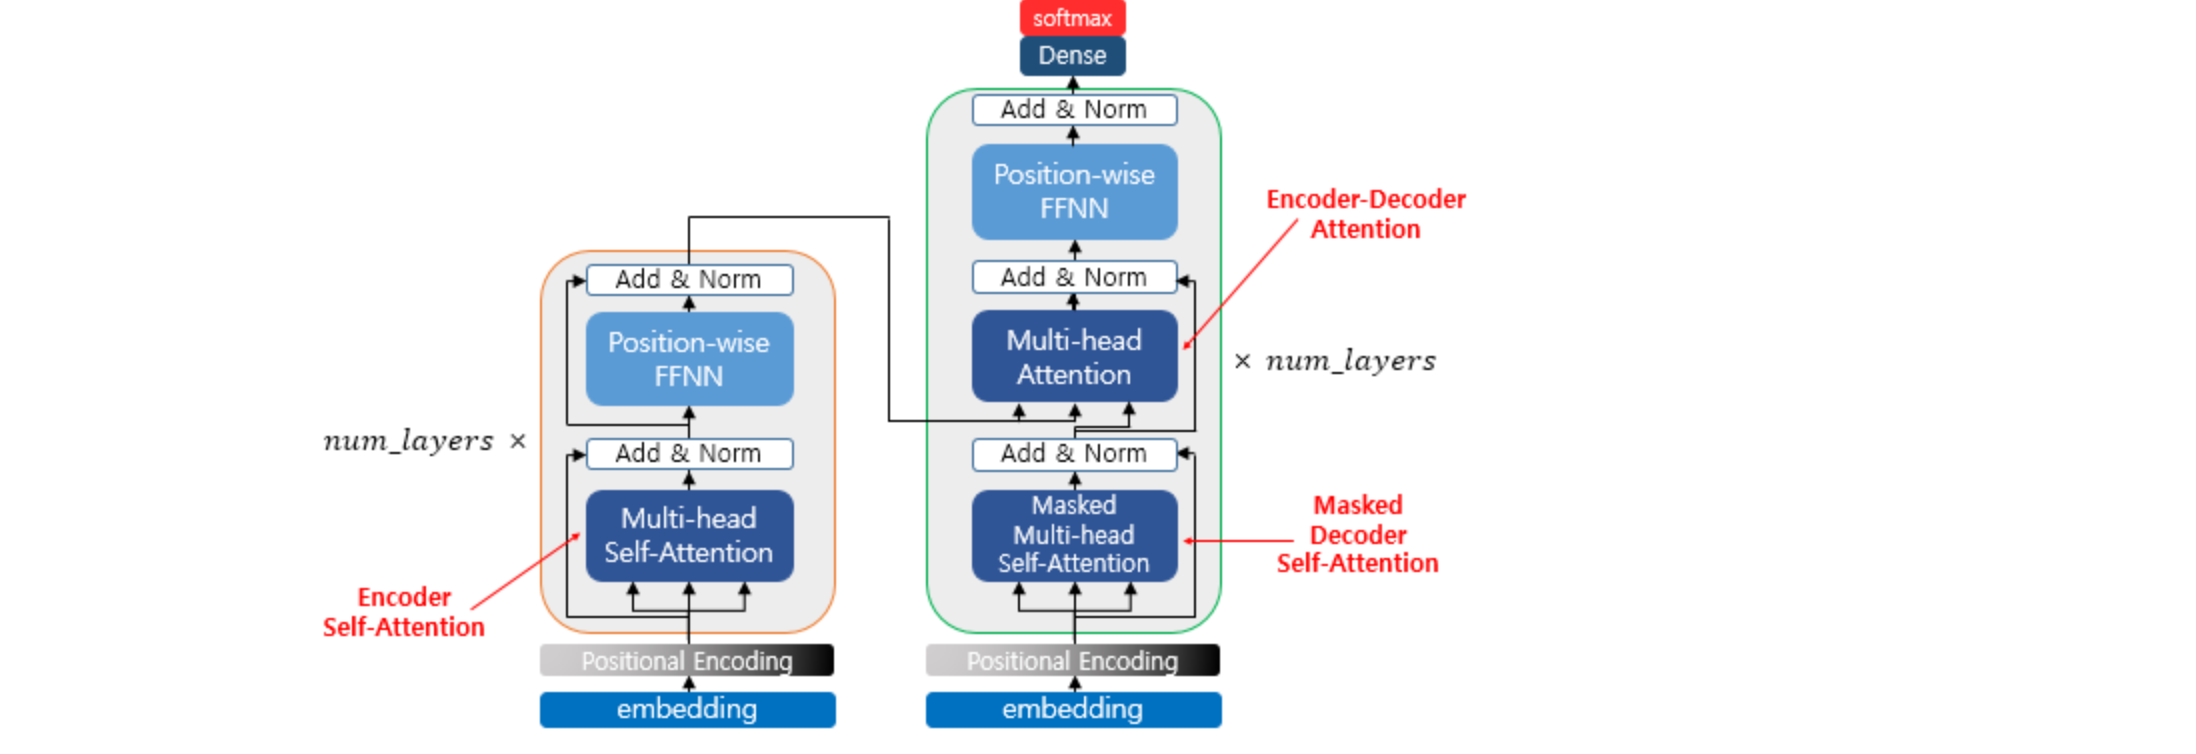
1. 인코더의 셀프 어텐션<br>
2. 디코더의 마스크드 셀프 어텐션<br>
3. 디코더의 인코더-디코더 어텐션<br>

<b>3개의 어텐션이 병렬적으로 수행하는 Multi-Head Attention으로 순서대로 이루어져 있음</b>

# 

### 👉🏻 인코더(Encoder)
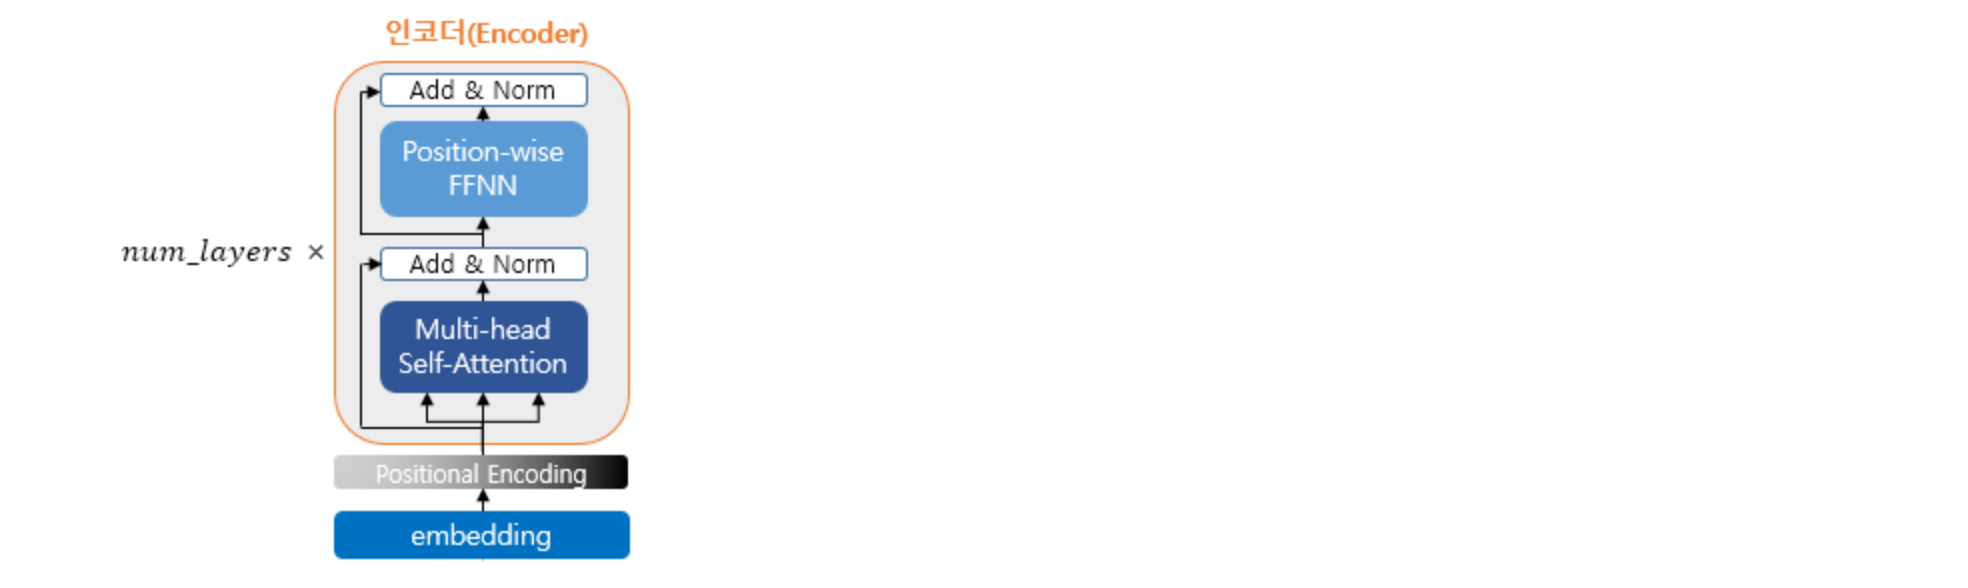
트랜스포머는 하이퍼파라미터인 num_layers 개수의 인코더 층을 쌓음<br>
하나의 인코더 층은 <b>2개의 sublayer(Self Attention, Feed Forward Neural Network)</b>로 나뉨<br>
* Position-wise FFNN = 일반적인 피드 포워드 신경망

# 

### 👉🏻 트랜스포머 주요 하이퍼파라미터
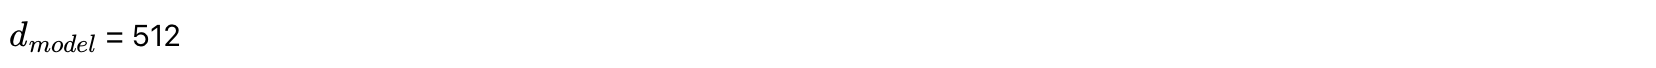
트랜스포머 인코더와 디코더에서의 정해진 입, 출력 크기를 의미<br>
또는, 임베딩 벡터 차원<br><br>
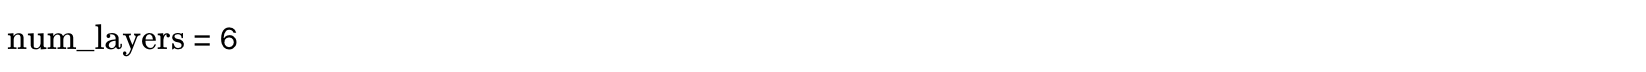
인코더, 디코더의 layer 개수<br><br>
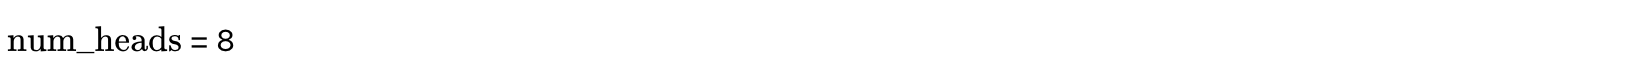
여러 개로 분할해서 병렬로 어텐션을 수행하고 결과값을 다시 하나로 합치는 방식<br>
병렬의 갯수가 8개<br><br>
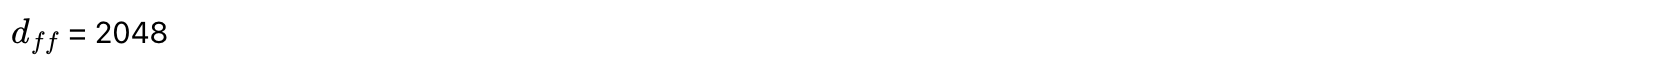
트랜스포머 내부에 피드포워드 신경망이 존재하며 해당 <b>신경망 은닉층 크기</b>를 의미

<blockquote>논문에서는 입,출력 크기 512<br>
    인코더, 디코더 layer 각각 6개</blockquote>